<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 머신러닝 교과서의 2장 코드입니다.



In [21]:
# 데이터 불러오기 붓꽃 데이터
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header = None)
df.tail() # 마지막 데이터 3개

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


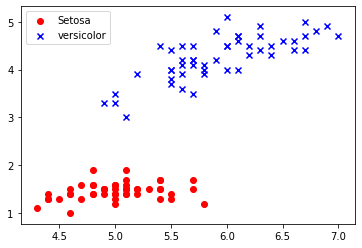

In [22]:
# 붓꽃 데이터의 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# y 데이터
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1,1)

# x 데이터
X = df.iloc[0:100, [0, 2]].values

# matplotlib pyplot 활용
plt.scatter(X[:50,0], X[:50, 1],
            color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100,1],
            color = 'blue', marker = 'x', label = 'versicolor')
plt.legend(loc = 'upper left')
plt.show()

In [0]:
# perceptron class 생성
import numpy as np

class Perceptron(object):

  def __init__ (self, eta = 0.01, n_iter = 50, random_state = 1): # eta, n_iter, randomstate 초기 설정
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  # fit method
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])

    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)

    return self

  # 계산 method
  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0])

  # 예측
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)


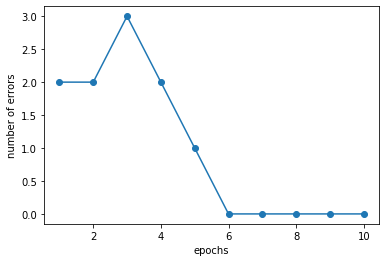

In [34]:
# Perceptron의 epoch별 errors (use perceptron class)
ppn = Perceptron(n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('number of errors')
plt.show()

In [0]:
from matplotlib.colors import ListedColormap

# 최종 적용과 graph plot
def plot_decision_regions(X, y, classifier, resolution = 0.02):

  markers = ('s', 'x') #안쓰이는 마크들은 없애서 책과 다름.. v나 ^
  colors = ('red', 'blue') # 안쓰이는 색들은 없애서 책과 다름.. cyan이나 gray
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)) 
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x = X[ y == cl, 0], y = X[ y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx],
                  label = cl, edgecolor = 'black')

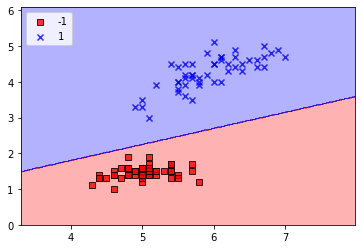

In [40]:
plot_decision_regions(X,y, classifier = ppn)
plt.legend(loc = 'upper left')
plt.show()